# Implementación de Logica Difusa para predicción del estado de motores a bordo de buques

## ***Definición de Niveles y Conjuntos Difusos***

In [1]:
from IPython.display import display, HTML

html_code = """
<style>
  table {
    font-family: Arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
  }
  th, td {
    border: 2px solid #8B4513; /* Color café */
    text-align: center;
    padding: 10px;
  }
  th {
    background-color: #8B4513; /* Fondo café oscuro */
    color: white; /* Texto blanco para contraste */
  }
  tr:nth-child(even) {
    background-color: #f5f5dc; /* Beige claro */
    color: #000000; /* Texto negro */
  }
  tr:nth-child(odd) {
    background-color: #ffffff; /* Blanco */
    color: #000000; /* Texto negro */
  }
  td.variable {
    background-color: #deb887; /* Café claro */
    color: #000000; /* Texto negro */
    font-weight: bold;
    text-align: center;
    vertical-align: middle;
  }
</style>

<h2 style="font-family: Arial; color: #8B4513;">Definición de Niveles Difusos</h2>

<table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Rango</th>
      <th>Conjunto Difuso</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td class="variable" rowspan="3">Presión</td>
      <td>9-11</td>
      <td>Normal</td>
    </tr>
    <tr>
      <td>11-12</td>
      <td>Alta</td>
    </tr>
    <tr>
      <td>12-15</td>
      <td>Muy Alta</td>
    </tr>
    <tr>
      <td class="variable" rowspan="3">Amperaje</td>
      <td>15-20</td>
      <td>Normal</td>
    </tr>
    <tr>
      <td>18-25</td>
      <td>Alto</td>
    </tr>
    <tr>
      <td>24-28</td>
      <td>Muy Alto</td>
    </tr>
    <tr>
      <td class="variable" rowspan="3">Vibraciones</td>
      <td>0.1-0.35</td>
      <td>Normales</td>
    </tr>
    <tr>
      <td>0.32-0.42</td>
      <td>Altas</td>
    </tr>
    <tr>
      <td>0.42-0.5</td>
      <td>Muy Altas</td>
    </tr>
    <tr>
      <td class="variable" rowspan="3">Temperatura</td>
      <td>50-80</td>
      <td>Normal</td>
    </tr>
    <tr>
      <td>77-90</td>
      <td>Alta</td>
    </tr>
    <tr>
      <td>85-110</td>
      <td>Muy Alta</td>
    </tr>
    <tr>
      <td class="variable" rowspan="3">Alineación</td>
      <td>85-100</td>
      <td>Ideal</td>
    </tr>
    <tr>
      <td>75-88</td>
      <td>Mala</td>
    </tr>
    <tr>
      <td>0-78</td>
      <td>Muy Mala</td>
    </tr>
    <tr>
      <td class="variable" rowspan="3">Estado del Equipo</td>
      <td>0-4</td>
      <td>Normal</td>
    </tr>
    <tr>
      <td>3-8</td>
      <td>Alerta</td>
    </tr>
    <tr>
      <td>7-10</td>
      <td>Crítico</td>
    </tr>
  </tbody>
</table>
"""
display(HTML(html_code))


## ***EDA***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn import metrics
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import plotly.graph_objects as go


In [3]:
df = pd.read_csv('../Datos/Datos.csv')

In [4]:
display("Dimensiones del dataset:", df.shape)

'Dimensiones del dataset:'

(475, 6)

In [5]:
display("Primeras filas del dataset:")
display(df.head())


'Primeras filas del dataset:'

,presion,amperaje,vibraciones,temperatura,alineacion,estado
0,9.3,18.5,0.2,51.6,94.0,3
1,10.7,16.6,0.3,68.7,97.2,4
2,10.8,17.4,0.2,64.1,92.8,4
3,10.4,18.5,0.3,52.8,85.1,3
4,9.4,15.5,0.2,67.6,98.2,2


In [6]:
# Estadísticas generales
display("Estadísticas generales del dataset:")
display(df.describe())


'Estadísticas generales del dataset:'

,presion,amperaje,vibraciones,temperatura,alineacion,estado
count,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000
mean,11.128000,20.126947,0.306737,76.169053,79.137474,4.189474
std,1.577156,3.626629,0.117628,14.761902,22.360719,2.970654
min,9.000000,15.000000,0.100000,50.000000,0.900000,0.000000
25%,9.900000,17.150000,0.200000,64.050000,78.050000,2.000000
50%,10.600000,19.200000,0.300000,77.300000,86.400000,4.000000
75%,12.250000,23.550000,0.400000,86.050000,92.350000,7.000000
max,15.000000,27.900000,0.500000,110.000000,99.900000,10.000000


1. **Presión (`presion`)**:
   - **Media**: 11.13, lo que indica que la mayoría de las lecturas están en un rango moderado (cercano a los niveles "Normal" o "Alta").
   - **Desviación estándar**: 1.58, lo que muestra una dispersión moderada en los datos.
   - **Rango**:
     - **Mínimo**: 9.00 (límites del conjunto "Normal").
     - **Máximo**: 15.00 (cercano a "Muy Alta").
     - **Percentil 25%**: 9.90.
     - **Percentil 75%**: 12.25 (transición entre "Alta" y "Muy Alta").
   - **Observación**: La mayoría de las lecturas se concentran entre valores normales y ligeramente altos (9.90 - 12.25).

2. **Amperaje (`amperaje`)**:
   - **Media**: 20.13, lo que corresponde al rango "Normal".
   - **Desviación estándar**: 3.63, mostrando una dispersión moderada.
   - **Rango**:
     - **Mínimo**: 15.00 (límite inferior de "Normal").
     - **Máximo**: 27.90 (dentro de "Muy Alto").
     - **Percentil 25%**: 17.15 (transición a "Alto").
     - **Percentil 75%**: 23.55 (límite superior de "Alto").
   - **Observación**: Aunque la media está en el rango normal, existe un rango amplio hacia valores altos.

3. **Vibraciones (`vibraciones`)**:
   - **Media**: 0.31, lo que está dentro del rango "Normales".
   - **Desviación estándar**: 0.12, mostrando baja variabilidad.
   - **Rango**:
     - **Mínimo**: 0.10 (extremo inferior de "Normales").
     - **Máximo**: 0.50 (cercano a "Muy Altas").
     - **Percentil 25%**: 0.20 (dentro de "Normales").
     - **Percentil 75%**: 0.40 (entre "Altas" y "Muy Altas").
   - **Observación**: La mayoría de los valores se concentran en el rango "Normales" con algunas excepciones altas.

4. **Temperatura (`temperatura`)**:
   - **Media**: 76.17°C, dentro del rango "Normal".
   - **Desviación estándar**: 14.76, indicando una dispersión significativa.
   - **Rango**:
     - **Mínimo**: 50.00°C (límite inferior de "Normal").
     - **Máximo**: 110.00°C (límite superior de "Muy Alta").
     - **Percentil 25%**: 64.05°C (dentro de "Normal").
     - **Percentil 75%**: 86.05°C (transición entre "Alta" y "Muy Alta").
   - **Observación**: Aunque la mayoría de los valores están en el rango "Normal", hay algunos casos extremos hacia "Muy Alta".

5. **Alineación (`alineacion`)**:
   - **Media**: 79.14, lo que corresponde al rango "Ideal".
   - **Desviación estándar**: 22.36, mostrando alta variabilidad.
   - **Rango**:
     - **Mínimo**: 0.90 (muy desalineado, "Muy Mala").
     - **Máximo**: 99.90 (dentro de "Ideal").
     - **Percentil 25%**: 78.05 (cercano a "Ideal").
     - **Percentil 75%**: 92.35 (en el rango "Ideal").
   - **Observación**: La mayoría de los valores son "Ideal", pero hay casos extremos que indican "Muy Mala".

6. **Estado (`estado`)**:
   - **Media**: 4.19, dentro del rango "Normal" o "Alerta".
   - **Desviación estándar**: 2.97, lo que indica dispersión significativa.
   - **Rango**:
     - **Mínimo**: 0.00 (equipo en buen estado, "Normal").
     - **Máximo**: 10.00 (equipo en estado crítico).
     - **Percentil 25%**: 2.00 ("Normal").
     - **Percentil 75%**: 7.00 ("Alerta" y transición a "Crítico").
   - **Observación**: Aunque la media está en "Normal", hay una alta dispersión hacia niveles críticos.


* ***Observaciones Generales:***
  - Las variables tienen rangos y desviaciones consistentes con los niveles difusos definidos.
  - **Presión, temperatura y amperaje** tienen distribuciones bien centradas en rangos normales o ligeramente altos.
  - **Vibraciones y alineación** muestran casos más extremos, lo que podría influir en el estado crítico del equipo.
  - **Estado** tiene una dispersión amplia, lo que sugiere la necesidad de reglas bien definidas para cubrir todas las combinaciones.

In [7]:
# Tipos de datos
display("Tipos de datos en el dataset:")
df.info()

'Tipos de datos en el dataset:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   presion      475 non-null    float64
 1   amperaje     475 non-null    float64
 2   vibraciones  475 non-null    float64
 3   temperatura  475 non-null    float64
 4   alineacion   475 non-null    float64
 5   estado       475 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 22.4 KB


El Dataset contiene en su mayoria datos de tipo `float`  y sin valores nulos

In [8]:
fig_presion = px.histogram(df, x="presion", nbins=20, title="Distribución de la Presión",
                           labels={"presion": "Presión"}, template="plotly_white")
fig_presion.show()

La distribución de la presión muestra una tendencia central predominante entre los valores de **9 a 12**, lo que corresponde a los niveles difusos "Normal" y "Alta". Sin embargo, presenta un **sesgo positivo**, con una cola más larga hacia la derecha, indicando que existen valores atípicos o menos frecuentes en el rango superior (14-15), asociados al nivel "Muy Alta". La curtosis parece ser **platocúrtica**, ya que la distribución no presenta un pico pronunciado, sino que está relativamente dispersa en su rango principal. Esto implica que la mayoría de los datos se concentran en valores moderados, con una menor proporción en los extremos. Estos patrones reflejan una variabilidad controlada en la presión, con posibles casos críticos que podrían influir en la toma de decisiones en un sistema difuso.

In [9]:
fig_amperaje = px.histogram(df, x="amperaje", nbins=20, title="Distribución del Amperaje",
                            labels={"amperaje": "Amperaje"}, template="plotly_white")
fig_amperaje.show()


La distribución del amperaje muestra una **tendencia bimodal**, con dos grupos principales de valores alrededor de **16-20** y **22.5-26**, lo que sugiere que los datos podrían pertenecer a dos subgrupos o condiciones operativas distintas. El rango predominante se encuentra entre **15 y 20**, lo que corresponde a los niveles "Normal" y "Alto".

El **sesgo** parece ser **ligeramente positivo**, con una cola más larga hacia la derecha, indicando que algunos valores elevados de amperaje son menos frecuentes pero aún están presentes. La **curtosis** es **mesocúrtica**, ya que la distribución no es ni demasiado plana ni demasiado apuntada, reflejando una dispersión moderada.

En general, el amperaje parece concentrarse en rangos normales y altos, con menos ocurrencias en los extremos más altos, lo que podría representar condiciones operativas exigentes o anómalas en los sistemas eléctricos. Estos patrones son cruciales para definir las reglas del sistema difuso, especialmente para identificar transiciones entre los niveles de riesgo en la operación del equipo.

In [10]:
fig_vibraciones = px.histogram(df, x="vibraciones", nbins=20, title="Distribución de las Vibraciones",
                               labels={"vibraciones": "Vibraciones"}, template="plotly_white")
fig_vibraciones.show()

La distribución de las vibraciones es predominantemente uniforme, con la mayoría de los valores concentrados entre **0.2 y 0.4**, correspondientes a niveles "Normales" y "Altas". Los valores extremos en **0.1** y **0.5** son menos frecuentes, indicando que las vibraciones muy bajas o muy altas son casos excepcionales. La distribución es simétrica y mesocúrtica, mostrando un equilibrio en las frecuencias sin picos extremos. Esto sugiere que las reglas difusas deben enfocarse en los rangos normales y altos, prestando atención a los valores extremos que podrían indicar condiciones críticas.

In [11]:
fig_temperatura = px.histogram(df, x="temperatura", nbins=20, title="Distribución de la Temperatura",
                               labels={"temperatura": "Temperatura (°C)"}, template="plotly_white")
fig_temperatura.show()

La distribución de la temperatura muestra una concentración principal entre **60°C y 90°C**, correspondiente a los niveles difusos "Normal" y "Alta". Aunque existen valores en los extremos más bajos (50°C) y altos (110°C), son significativamente menos frecuentes. La distribución tiene un **sesgo positivo leve**, con una cola extendida hacia valores altos, indicando la presencia de temperaturas elevadas poco comunes. La **curtosis** es mesocúrtica, con una dispersión equilibrada pero sin picos pronunciados. Esto sugiere que la temperatura generalmente se encuentra dentro de rangos aceptables, pero con algunos casos de riesgo en valores altos que deben monitorearse.

In [12]:
fig_alineacion = px.histogram(df, x="alineacion", nbins=20, title="Distribución de la Alineación",
                              labels={"alineacion": "Alineación"}, template="plotly_white")
fig_alineacion.show()

La distribución de la alineación muestra una concentración clara en valores altos, entre **85 y 100**, que corresponden al nivel "Ideal". Sin embargo, hay una baja frecuencia de datos en rangos inferiores, especialmente por debajo de **75**, lo que indica que las condiciones de alineación "Mala" y "Muy Mala" son casos poco comunes. La distribución es **asimétrica negativa**, ya que la mayoría de los datos se agrupan hacia el extremo superior. La **curtosis** es leptocúrtica, ya que existe una alta concentración en un rango estrecho de valores altos.

In [13]:
fig_estado = px.histogram(df, x="estado", nbins=20, title="Distribución del Estado del Equipo",
                          labels={"estado": "Estado del Equipo"}, template="plotly_white")
fig_estado.show()

La distribución del estado del equipo muestra una tendencia **bimodal**, con una alta concentración en valores bajos (estado "Normal") y otra en valores altos (estado "Crítico"), mientras que los valores intermedios (estado "Alerta") son menos frecuentes. Esto indica que los equipos tienden a operar en condiciones óptimas o, en casos significativos, en condiciones críticas, con pocas transiciones en los estados de advertencia. Este comportamiento resalta la importancia de reglas difusas bien definidas para anticipar cambios hacia estados críticos y priorizar las acciones de mantenimiento.

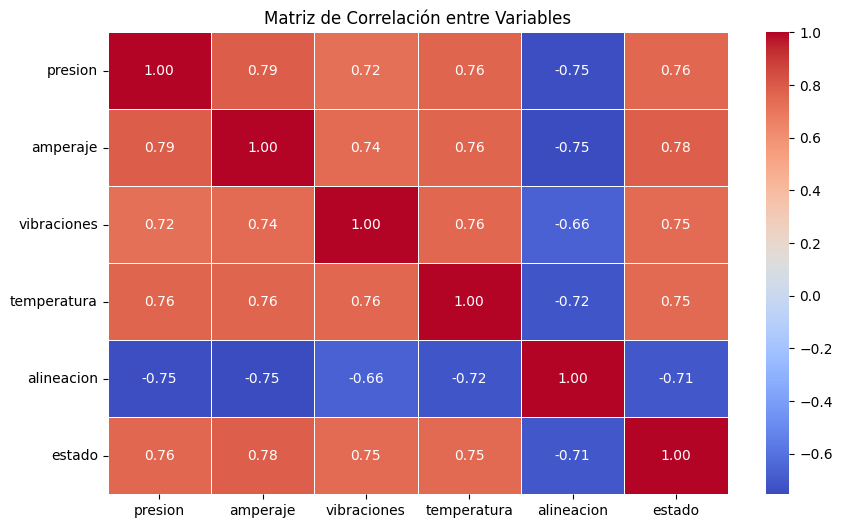

In [14]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()

1. **Correlaciones Positivas Fuertes:**
   - **Presión y Amperaje (0.79):** Existe una fuerte relación positiva entre estas variables, lo que indica que a medida que aumenta la presión, también lo hace el amperaje. Esto puede deberse a una mayor carga de trabajo del equipo.
   - **Estado y Amperaje (0.78):** El estado del equipo tiende a deteriorarse a medida que aumenta el amperaje, lo que lo convierte en un indicador clave para el análisis de fallas.
   - **Presión y Temperatura (0.76):** La presión y la temperatura están fuertemente relacionadas, lo cual es consistente con condiciones operativas intensas.

2. **Correlaciones Negativas Fuertes:**
   - **Alineación y Estado (-0.71):** Existe una relación inversa significativa entre la alineación y el estado, lo que indica que una mala alineación está directamente asociada a un peor estado del equipo.
   - **Alineación y Amperaje (-0.75):** Una mala alineación se asocia a un mayor amperaje, probablemente debido a la fricción o desbalanceo, lo que aumenta el esfuerzo del sistema.


- **Indicadores Clave:**  La alineación es un un factor críticos para mantener el estado del equipo en condiciones óptimas, ya que su correlacion negativas sugieren que afectan directamente la operación y desempeño.

- **Priorización:** El enfoque debe estar en controlar alineación (sobre todo), así como las demas variables que igualmente tienen un valor alto de correlación, es decir que son fundamentales para controlar las condiciones críticas y prolongar la vida útil del equipo.

## ***Definición de funciones de petenencia***

### ***Presión***

/Users/sergiosilveramurcia/Conda/miniconda3/envs/TimesSeries/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



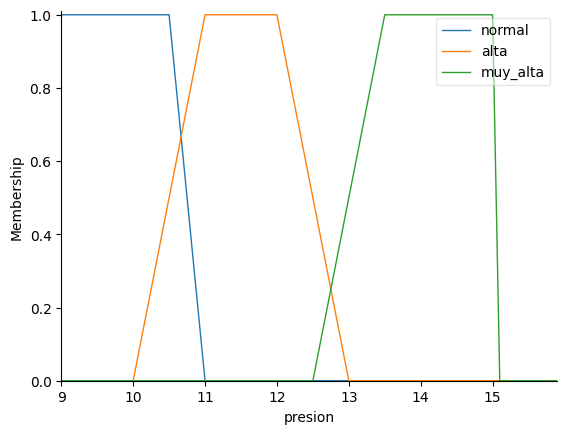

In [15]:
# Definir la variable difusa para Presión
presion = ctrl.Antecedent(np.arange(9, 16, 0.1), 'presion')

presion['normal'] = fuzz.trapmf(presion.universe, [9, 9, 10.5, 11])
presion['alta'] = fuzz.trapmf(presion.universe, [10, 11, 12, 13])
presion['muy_alta'] = fuzz.trapmf(presion.universe, [12.5, 13.5, 15, 15]) 

# Visualizar las funciones de pertenencia
presion.view(title="Funciones de Pertenencia para Presión")
plt.show()


$$
\mu_{\text{Normal}}(x) =
\begin{cases} 
0, & x < 9 \\
\frac{x - 9}{1}, & 9 \leq x \leq 10 \\
1, & 10 \leq x \leq 11 \\
\frac{11 - x}{1}, & 11 \leq x \leq 12 \\
0, & x > 12
\end{cases}
$$


$$
\mu_{\text{Alta}}(x) =
\begin{cases} 
0, & x < 10 \\
\frac{x - 10}{1}, & 10 \leq x \leq 11 \\
1, & 11 \leq x \leq 12 \\
\frac{13 - x}{1}, & 12 \leq x \leq 13 \\
0, & x > 13
\end{cases}
$$


$$
\mu_{\text{Muy Alta}}(x) =
\begin{cases} 
0, & x < 12 \\
\frac{x - 12}{1}, & 12 \leq x \leq 13 \\
1, & 13 \leq x \leq 15 \\
0, & x > 15
\end{cases}
$$


***Justificación:***
1. **Trapezoidal:**
   - Se selecciona una función trapezoidal porque los límites del rango son claros y queremos una representación estable dentro del rango central.

### ***Amperaje***

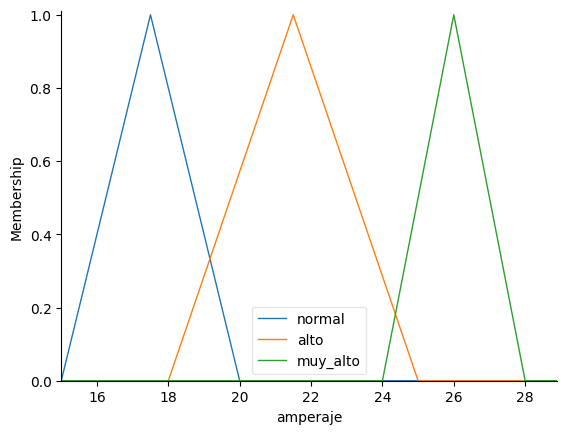

In [16]:
# Definir la variable difusa para Amperaje
amperaje = ctrl.Antecedent(np.arange(15, 29, 0.1), 'amperaje')

# Definir las funciones de pertenencia (todas triangulares)
amperaje['normal'] = fuzz.trimf(amperaje.universe, [15, 17.5, 20])    # Triangular para rango bajo
amperaje['alto'] = fuzz.trimf(amperaje.universe, [18, 21.5, 25])      # Triangular para transición
amperaje['muy_alto'] = fuzz.trimf(amperaje.universe, [24, 26, 28])    # Triangular para rango alto

# Visualizar las funciones de pertenencia
amperaje.view(title="Funciones de Pertenencia para Amperaje")
plt.show()


$$
\mu_{\text{Normal}}(x) =
\begin{cases} 
0 & \text{si } x \leq 15 \text{ o } x \geq 20 \\
\frac{x - 15}{2.5} & \text{si } 15 < x \leq 17.5 \\
\frac{20 - x}{2.5} & \text{si } 17.5 < x < 20
\end{cases}
$$


$$
\mu_{\text{Alto}}(x) =
\begin{cases} 
0 & \text{si } x \leq 18 \text{ o } x \geq 25 \\
\frac{x - 18}{3.5} & \text{si } 18 < x \leq 21.5 \\
\frac{25 - x}{3.5} & \text{si } 21.5 < x < 25
\end{cases}
$$


$$
\mu_{\text{Muy Alto}}(x) =
\begin{cases} 
0 & \text{si } x \leq 24 \text{ o } x \geq 28 \\
\frac{x - 24}{2} & \text{si } 24 < x \leq 26 \\
\frac{28 - x}{2} & \text{si } 26 < x < 28
\end{cases}
$$


### ***Vibraciones***

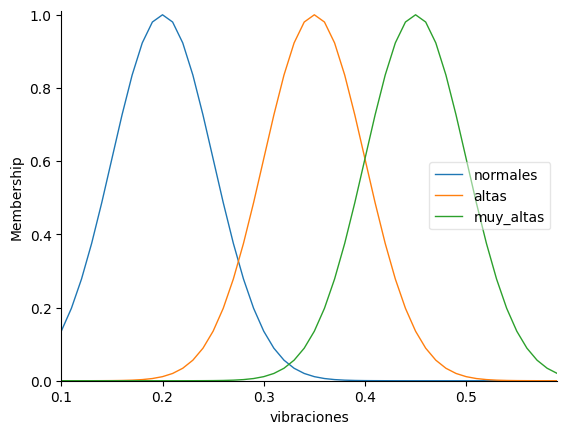

In [17]:
# Definir la variable difusa para Vibraciones
vibraciones = ctrl.Antecedent(np.arange(0.1, 0.6, 0.01), 'vibraciones')

# Definir las funciones de pertenencia (gaussianas)
vibraciones['normales'] = fuzz.gaussmf(vibraciones.universe, mean=0.2, sigma=0.05)   # Gaussiana centrada en 0.2
vibraciones['altas'] = fuzz.gaussmf(vibraciones.universe, mean=0.35, sigma=0.05)     # Gaussiana centrada en 0.35
vibraciones['muy_altas'] = fuzz.gaussmf(vibraciones.universe, mean=0.45, sigma=0.05) # Gaussiana centrada en 0.45

# Visualizar las funciones de pertenencia
vibraciones.view(title="Funciones de Pertenencia para Vibraciones (Gaussianas)")
plt.show()


$$
\mu_{\text{Normales}}(x) =
\begin{cases} 
0, & x < 0.1 \\
e^{-\frac{(x - 0.2)^2}{2 \cdot (0.05)^2}}, & 0.1 \leq x \leq 0.35 \\
0, & x > 0.35
\end{cases}
$$


$$
\mu_{\text{Altas}}(x) =
\begin{cases} 
0, & x < 0.2 \\
e^{-\frac{(x - 0.35)^2}{2 \cdot (0.05)^2}}, & 0.2 \leq x \leq 0.42 \\
0, & x > 0.42
\end{cases}
$$

$$
\mu_{\text{Muy Altas}}(x) =
\begin{cases} 
0, & x < 0.35 \\
e^{-\frac{(x - 0.45)^2}{2 \cdot (0.05)^2}}, & 0.35 \leq x \leq 0.5 \\
0, & x > 0.5
\end{cases}
$$


***Justificación***

Para la variable **Vibraciones**, se seleccionaron funciones gaussianas para capturar la variabilidad y transición suave entre los niveles difusos. El conjunto **Normales** utiliza una función gaussiana centrada en **0.2** con una desviación estándar pequeña (**0.05**), lo que representa vibraciones bajas características de un equipo en condiciones normales. El conjunto **Altas** está centrado en **0.35** con la misma desviación estándar (**0.05**) para reflejar el rango típico de una operación con un aumento leve de vibraciones, permitiendo capturar transiciones hacia niveles críticos. Por último, el conjunto **Muy Altas** emplea una función gaussiana centrada en **0.45**, también con una desviación estándar de **0.05**, lo que caracteriza estados de alta vibración que podrían indicar problemas significativos en el equipo. Las funciones gaussianas se seleccionaron para esta variable debido a que las vibraciones suelen cambiar de manera gradual, lo que hace que esta forma sea adecuada para representar transiciones suaves y realistas entre los niveles.

### ***Temperatura***

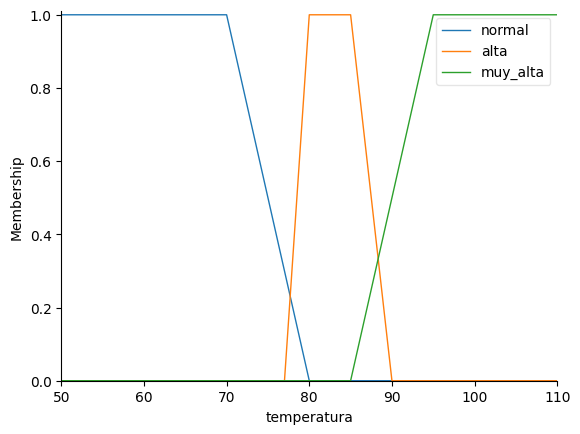

In [18]:
# Definir la variable difusa para Temperatura
temperatura = ctrl.Antecedent(np.arange(50, 111, 1), 'temperatura')

# Funciones de pertenencia (todas trapezoidales)
temperatura['normal'] = fuzz.trapmf(temperatura.universe, [50, 50, 70, 80])      # Trapezoidal para Normal
temperatura['alta'] = fuzz.trapmf(temperatura.universe, [77, 80, 85, 90])        # Trapezoidal para Alta
temperatura['muy_alta'] = fuzz.trapmf(temperatura.universe, [85, 95, 110, 110])  # Trapezoidal para Muy Alta

# Visualización
temperatura.view(title="Funciones de Pertenencia para Temperatura (Trapezoidales)")
plt.show()


$$
\mu_{\text{Normal}}(x) =
\begin{cases} 
0, & x < 50 \\
\frac{x - 50}{20}, & 50 \leq x \leq 70 \\
1, & 70 \leq x \leq 80 \\
\frac{80 - x}{10}, & 80 \leq x \leq 90 \\
0, & x > 90
\end{cases}
$$


$$
\mu_{\text{Alta}}(x) =
\begin{cases} 
0, & x < 77 \\
\frac{x - 77}{3}, & 77 \leq x \leq 80 \\
1, & 80 \leq x \leq 85 \\
\frac{90 - x}{5}, & 85 \leq x \leq 90 \\
0, & x > 90
\end{cases}
$$


$$
\mu_{\text{Muy Alta}}(x) =
\begin{cases} 
0, & x < 85 \\
\frac{x - 85}{10}, & 85 \leq x \leq 95 \\
1, & 95 \leq x \leq 110 \\
0, & x > 110
\end{cases}
$$


### ***Alineación***

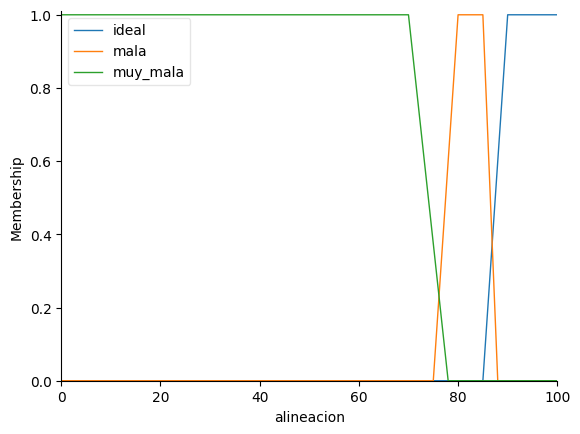

In [19]:
# Definir la variable difusa para Alineación
alineacion = ctrl.Antecedent(np.arange(0, 101, 1), 'alineacion')

# Funciones de pertenencia (todas trapezoidales)
alineacion['ideal'] = fuzz.trapmf(alineacion.universe, [85, 90, 100, 100])      # Trapezoidal para Ideal
alineacion['mala'] = fuzz.trapmf(alineacion.universe, [75, 80, 85, 88])         # Trapezoidal para Mala
alineacion['muy_mala'] = fuzz.trapmf(alineacion.universe, [0, 0, 70, 78])       # Trapezoidal para Muy Mala

# Visualización
alineacion.view(title="Funciones de Pertenencia para Alineación (Trapezoidales)")
plt.show()


Para la variable **Alineación**, se seleccionaron funciones trapezoidales debido a que esta variable presenta rangos bien definidos con estabilidad en los extremos. El nivel **Ideal** (85-100) refleja una condición óptima del equipo, con estabilidad dentro del rango superior. El nivel **Mala** (75-88) captura la transición entre alineación adecuada e inadecuada, permitiendo representar condiciones de deterioro gradual. Finalmente, el nivel **Muy Mala** (0-78) modela alineaciones severamente desviadas del estándar, con estabilidad en valores críticos. Las funciones trapezoidales fueron elegidas porque las transiciones en la alineación son graduales y los valores tienden a concentrarse en los extremos, lo que hace que esta forma sea adecuada para capturar tanto la estabilidad como las transiciones suaves.

$$
\mu_{\text{ideal}}(x) =
\begin{cases} 
0, & x < 85 \\
\frac{x - 85}{5}, & 85 \leq x < 90 \\
1, & 90 \leq x \leq 100 \\
0, & x > 100
\end{cases}
$$

$$
\mu_{\text{mala}}(x) =
\begin{cases} 
0, & x < 75 \\
\frac{x - 75}{5}, & 75 \leq x < 80 \\
1, & 80 \leq x \leq 85 \\
\frac{88 - x}{3}, & 85 < x \leq 88 \\
0, & x > 88
\end{cases}
$$

$$
\mu_{\text{muy\_mala}}(x) =
\begin{cases} 
1, & x \leq 70 \\
\frac{78 - x}{8}, & 70 < x \leq 78 \\
0, & x > 78
\end{cases}
$$

### ***Estado***

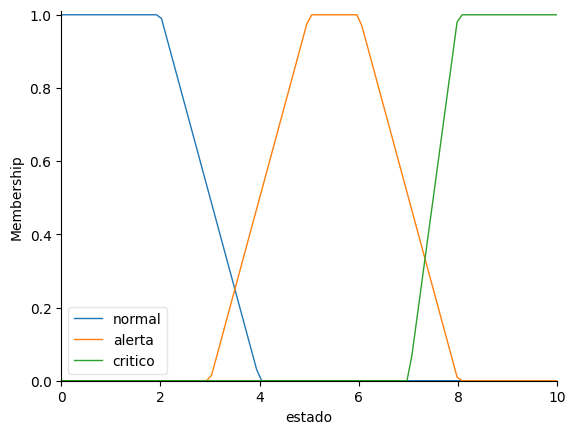

In [20]:
# Definir la variable difusa para Estado del Equipo
#estado = ctrl.Consequent(np.arange(0, 11, 1), 'estado')
estado = ctrl.Consequent(np.linspace(0, 10, 100), 'estado')

# Funciones de pertenencia (trapezoidales para consistencia)
estado['normal'] = fuzz.trapmf(estado.universe, [0, 0, 2, 4])      # Trapezoidal para Normal
estado['alerta'] = fuzz.trapmf(estado.universe, [3, 5, 6, 8])      # Trapezoidal para Alerta
estado['critico'] = fuzz.trapmf(estado.universe, [7, 8, 10, 10])   # Trapezoidal para Crítico

# Visualización
estado.view(title="Funciones de Pertenencia para Estado del Equipo")
plt.show()


$$
\mu_{\text{Normal}}(x) =
\begin{cases} 
0, & x < 0 \\
1, & 0 \leq x \leq 2 \\
\frac{4 - x}{2}, & 2 \leq x \leq 4 \\
0, & x > 4
\end{cases}
$$


$$
\mu_{\text{Alerta}}(x) =
\begin{cases} 
0, & x < 3 \\
\frac{x - 3}{2}, & 3 \leq x \leq 5 \\
1, & 5 \leq x \leq 6 \\
\frac{8 - x}{2}, & 6 \leq x \leq 8 \\
0, & x > 8
\end{cases}
$$


$$
\mu_{\text{Crítico}}(x) =
\begin{cases} 
0, & x < 7 \\
\frac{x - 7}{1}, & 7 \leq x \leq 8 \\
1, & 8 \leq x \leq 10 \\
0, & x > 10
\end{cases}
$$


***Justificación:***

Para la variable objetivo **Estado del Equipo**, se definieron tres niveles lingüísticos: **Normal**, **Alerta**, y **Crítico**, utilizando funciones trapezoidales. El nivel **Normal** representa un estado óptimo del equipo, con estabilidad en valores bajos (0-4). El nivel **Alerta** modela una transición intermedia (3-8), reflejando condiciones donde el equipo muestra señales de deterioro. Finalmente, el nivel **Crítico** captura estados de operación inaceptables (7-10), indicando riesgos significativos de falla. Las funciones trapezoidales permiten transiciones graduales entre estos niveles, reflejando la naturaleza progresiva de los estados del equipo. 

## ***Definición de Reglas***

### ***Rules***

In [21]:
rules = [
    ctrl.Rule(presion['normal'] & amperaje['normal'] & vibraciones['normales'], estado['normal']),
    ctrl.Rule(presion['alta'] & amperaje['alto'] & vibraciones['altas'], estado['alerta']),
    ctrl.Rule(presion['muy_alta'] | amperaje['muy_alto'] | vibraciones['muy_altas'], estado['critico']),
    ctrl.Rule(temperatura['normal'] & alineacion['ideal'], estado['normal']),
    ctrl.Rule(temperatura['alta'] & alineacion['mala'], estado['alerta']),
    ctrl.Rule(temperatura['muy_alta'] & alineacion['muy_mala'], estado['critico']),
    ctrl.Rule(presion['alta'] & vibraciones['altas'], estado['alerta']),
    ctrl.Rule(presion['muy_alta'] & temperatura['muy_alta'], estado['critico']),
    ctrl.Rule(amperaje['normal'] & alineacion['ideal'], estado['normal']),
    ctrl.Rule(amperaje['alto'] & alineacion['mala'], estado['alerta']),
    ctrl.Rule(amperaje['muy_alto'] & alineacion['muy_mala'], estado['critico']),
    ctrl.Rule(vibraciones['normales'] & alineacion['ideal'], estado['normal']),
    ctrl.Rule(vibraciones['altas'] & alineacion['mala'], estado['alerta']),
    ctrl.Rule(vibraciones['muy_altas'] & alineacion['muy_mala'], estado['critico']),
    ctrl.Rule(presion['normal'] & temperatura['normal'], estado['normal']),
    ctrl.Rule(presion['alta'] & temperatura['alta'], estado['alerta']),
    ctrl.Rule(presion['muy_alta'] & temperatura['muy_alta'], estado['critico']),
    ctrl.Rule(amperaje['normal'] & temperatura['normal'], estado['normal']),
    ctrl.Rule(amperaje['alto'] & temperatura['alta'], estado['alerta']),
    ctrl.Rule(amperaje['muy_alto'] & temperatura['muy_alta'], estado['critico']),
    ctrl.Rule(presion['normal'] & amperaje['normal'] & temperatura['normal'], estado['normal']),
    ctrl.Rule(presion['alta'] & vibraciones['altas'] & alineacion['mala'], estado['alerta']),
    ctrl.Rule(presion['muy_alta'] & amperaje['muy_alto'] & temperatura['muy_alta'], estado['critico']),
    ctrl.Rule(amperaje['normal'] & temperatura['normal'] & alineacion['ideal'], estado['normal']),
    ctrl.Rule(amperaje['alto'] & vibraciones['altas'] & alineacion['mala'], estado['alerta']),
    ctrl.Rule(amperaje['muy_alto'] & alineacion['muy_mala'] & temperatura['muy_alta'], estado['critico']),
    ctrl.Rule(vibraciones['normales'] & temperatura['normal'] & alineacion['ideal'], estado['normal']),
    ctrl.Rule(vibraciones['altas'] & temperatura['alta'] & alineacion['mala'], estado['alerta']),
    ctrl.Rule(vibraciones['muy_altas'] & alineacion['muy_mala'] & temperatura['muy_alta'], estado['critico']),
    ctrl.Rule(presion['alta'] & amperaje['alto'] & vibraciones['altas'], estado['alerta']),
    ctrl.Rule(presion['muy_alta'] & amperaje['muy_alto'] & alineacion['muy_mala'], estado['critico']),
    ctrl.Rule(temperatura['normal'] & alineacion['ideal'] & presion['normal'], estado['normal']),
    ctrl.Rule(temperatura['alta'] & alineacion['mala'] & amperaje['alto'], estado['alerta']),
    ctrl.Rule(temperatura['muy_alta'] & alineacion['muy_mala'] & vibraciones['muy_altas'], estado['critico']),
    ctrl.Rule(presion['normal'] & vibraciones['normales'] & temperatura['normal'], estado['normal']),
    ctrl.Rule(presion['alta'] & vibraciones['altas'] & temperatura['alta'], estado['alerta']),
    ctrl.Rule(presion['muy_alta'] & vibraciones['muy_altas'] & temperatura['muy_alta'], estado['critico']),
    ctrl.Rule(amperaje['normal'] & vibraciones['normales'] & alineacion['ideal'], estado['normal']),
    ctrl.Rule(amperaje['alto'] & vibraciones['altas'] & alineacion['mala'], estado['alerta']),
    ctrl.Rule(amperaje['muy_alto'] & vibraciones['muy_altas'] & alineacion['muy_mala'], estado['critico']),
]

# Crear el sistema de control
sistema_control = ctrl.ControlSystem(rules)
simulador = ctrl.ControlSystemSimulation(sistema_control)

En este sistema, se definieron **40 reglas difusas** que relacionan los distintos niveles de las variables de entrada con el estado del equipo. Estas reglas se diseñaron cuidadosamente para capturar la lógica del dominio, evitando una **combinatoria completa** de los niveles de las variables.

* **¿Por qué no se utilizó una combinatoria completa?**

   1. **Redundancia:**
      - Algunas combinaciones de niveles resultan en reglas redundantes, ya que describen situaciones que ya están capturadas por otras reglas similares.

   2. **Falta de Sentido:**
      - Otras combinaciones, aunque técnicamente posibles, no tienen sentido desde el punto de vista lógico o del dominio. Por ejemplo:
      - Una regla que combine un nivel extremo de vibraciones (`Muy Altas`) con un nivel ideal de alineación podría no tener significado físico.

   3. **Eficiencia del Sistema:**
      - Reducir el número de reglas evita complicar innecesariamente el sistema, mejorando su interpretabilidad y eficiencia computacional.

* **Diseño de las Reglas**
   - Las reglas fueron seleccionadas para representar **escenarios realistas** que ocurren en el estado del equipo:
   - Por ejemplo, niveles **altos de vibración** y **alta temperatura** podrían sugerir un estado de **alerta**.
   - Por otro lado, una **presión normal** combinada con una **alineación ideal** indicaría un estado **normal**.
   
* **Ejemplo de Reglas Definidas**
   1. **Estado Normal:**
      - Si la presión es **normal** y la alineación es **ideal**, entonces el estado del equipo es **normal**.
      - Si la temperatura es **normal** y las vibraciones son **normales**, entonces el estado del equipo es **normal**.

   2. **Estado de Alerta:**
      - Si la presión es **alta** y las vibraciones son **altas**, entonces el estado del equipo es **alerta**.
      - Si la temperatura es **alta** y la alineación es **mala**, entonces el estado del equipo es **alerta**.

   3. **Estado Crítico:**
      - Si la presión es **muy alta** y las vibraciones son **muy altas**, entonces el estado del equipo es **crítico**.
      - Si la temperatura es **muy alta** y la alineación es **muy mala**, entonces el estado del equipo es **crítico**.

## ***Desfuzificación***

Para la ***desfuzificación*** se empleo el metodo del ***centroide***, a continuación se muestra un ejemplo de interacción con el sistema inteligente:

In [22]:
simulador.input['presion'] = 9  # Ejemplo: Presión Normal
simulador.input['amperaje'] = 15  # Ejemplo: Amperaje Normal
simulador.input['vibraciones'] = 0.2  # Ejemplo: Vibraciones Normal
simulador.input['temperatura'] = 77  # Ejemplo: Temperatura Normal/alta
simulador.input['alineacion'] = 90  # Ejemplo: Alineación Ideal

# Computar el resultado
simulador.compute()

# Valor nítido del motor obtenido por desfuzzificación
valor_crisp = simulador.output['estado']

# Calcular el grado de pertenencia para cada nivel lingüístico
grados_pertenencia = {}
for label, membership_function in estado.terms.items():
    grados_pertenencia[label] = fuzz.interp_membership(estado.universe, membership_function.mf, valor_crisp)

# Determinar el nivel lingüístico con mayor grado de pertenencia
estado_motor = max(grados_pertenencia, key=grados_pertenencia.get)

# Mostrar resultados
print("Valor Crisp Desfuzzificado:", valor_crisp)
print("Grados de Pertenencia:", grados_pertenencia)
print("Estado del Motor:", estado_motor)

Valor Crisp Desfuzzificado: 1.5560213330108459
Grados de Pertenencia: {'normal': 1.0, 'alerta': 0.0, 'critico': 0.0}
Estado del Motor: normal


El metodo de ***defuzificación*** lo podemos validar con la siguiente línea de `código`

In [23]:
estado.defuzzify_method


'centroid'

Podemos realizar el mismo procedimiento para diferentes valores de cada variables y obtener una ***visualización gráfica*** así:

<Figure size 800x600 with 0 Axes>

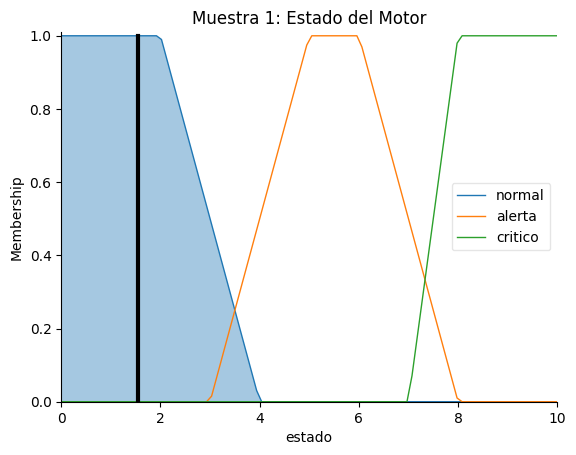

<Figure size 800x600 with 0 Axes>

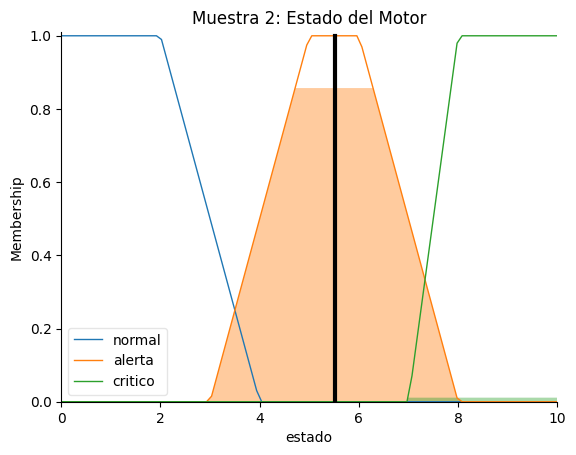

<Figure size 800x600 with 0 Axes>

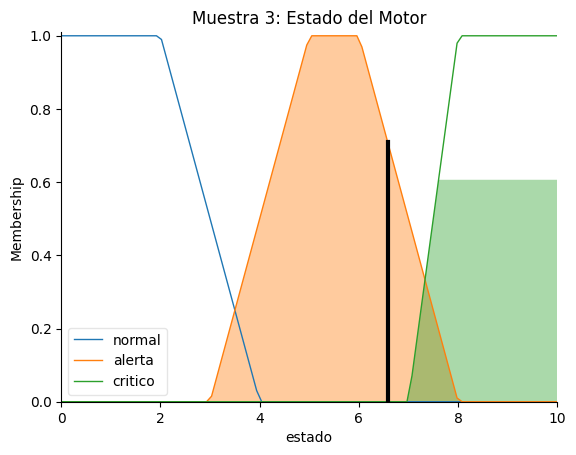

<Figure size 800x600 with 0 Axes>

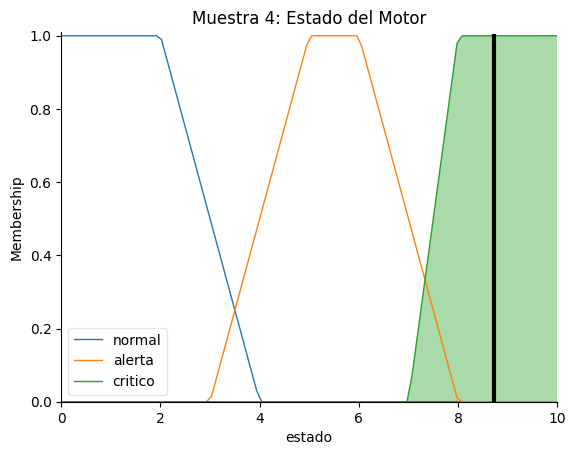

Tabla de Resultados:
Muestra 1: Estado del Motor = 1.56
Muestra 2: Estado del Motor = 5.53
Muestra 3: Estado del Motor = 6.58
Muestra 4: Estado del Motor = 8.73


In [24]:
# Definir las muestras de entrada
muestras = [
    {'presion': 10, 'amperaje': 20, 'vibraciones': 0.2, 'temperatura': 70, 'alineacion': 90},
    {'presion': 11, 'amperaje': 22, 'vibraciones': 0.3, 'temperatura': 75, 'alineacion': 85},
    {'presion': 12, 'amperaje': 24, 'vibraciones': 0.4, 'temperatura': 85, 'alineacion': 75},
    {'presion': 13, 'amperaje': 26, 'vibraciones': 0.5, 'temperatura': 90, 'alineacion': 70}
]

# Iterar sobre las muestras y generar gráficas
for i, muestra in enumerate(muestras):
    # Asignar valores de entrada
    simulador.input['presion'] = muestra['presion']
    simulador.input['amperaje'] = muestra['amperaje']
    simulador.input['vibraciones'] = muestra['vibraciones']
    simulador.input['temperatura'] = muestra['temperatura']
    simulador.input['alineacion'] = muestra['alineacion']
    
    # Computar el resultado
    simulador.compute()
    
    plt.figure(figsize=(8, 6))
    estado.view(sim=simulador) 
    plt.title(f"Muestra {i + 1}: Estado del Motor")
    plt.show()

# Mostrar tabla de resultados
print("Tabla de Resultados:")
for i, muestra in enumerate(muestras):
    simulador.input['presion'] = muestra['presion']
    simulador.input['amperaje'] = muestra['amperaje']
    simulador.input['vibraciones'] = muestra['vibraciones']
    simulador.input['temperatura'] = muestra['temperatura']
    simulador.input['alineacion'] = muestra['alineacion']
    simulador.compute()
    valor_crisp = simulador.output['estado']
    print(f"Muestra {i + 1}: Estado del Motor = {valor_crisp:.2f}")

## ***Evaluación del Sistema***

In [27]:
# Definir los niveles y los rangos para mapeo de predicciones crisp y etiquetas reales
def mapear_estado(valor_crisp):
    if 0 <= valor_crisp <= 4:
        return "normal"
    elif 4 < valor_crisp <= 8:
        return "alerta"
    elif 8 < valor_crisp <= 10:
        return "critico"
    else:
        return "desconocido"

# Mapear las etiquetas reales en el DataFrame
df['estado_mapeado'] = df['estado'].apply(mapear_estado)

# Crear listas de las entradas y la salida real desde el DataFrame
inputs_presion = df['presion'].tolist()
inputs_amperaje = df['amperaje'].tolist()
inputs_vibraciones = df['vibraciones'].tolist()
inputs_temperatura = df['temperatura'].tolist()
inputs_alineacion = df['alineacion'].tolist()
y_true = df['estado_mapeado'].tolist()  # Etiquetas reales mapeadas

# Crear una lista para almacenar las predicciones del sistema difuso
y_pred = []

# Realizar inferencia para todas las muestras
for i in range(len(df)):
    try:
        # Asignar entradas al sistema difuso
        simulador.input['presion'] = inputs_presion[i]
        simulador.input['amperaje'] = inputs_amperaje[i]
        simulador.input['vibraciones'] = inputs_vibraciones[i]
        simulador.input['temperatura'] = inputs_temperatura[i]
        simulador.input['alineacion'] = inputs_alineacion[i]
        
        # Realizar inferencia
        simulador.compute()
        valor_crisp = simulador.output["estado"]
        
        # Mapear el valor crisp a un nivel lingüístico
        estado_predicho = mapear_estado(valor_crisp)
        y_pred.append(estado_predicho)
    except Exception as e:
        print(f"Error en la fila {i}: {e}")
        y_pred.append("desconocido")  # Etiqueta para errores

# Asegurarse de que ambas listas (y_true, y_pred) sean consistentes
if len(y_true) != len(y_pred):
    print("Error: Las listas de etiquetas reales y predichas tienen tamaños diferentes.")

# Calcular la matriz de confusión
etiquetas = ["normal", "alerta", "critico"] 
matriz_confusion = confusion_matrix(y_true, y_pred, labels=etiquetas)

# Crear un DataFrame para la matriz de confusión
df_confusion = pd.DataFrame(matriz_confusion, index=etiquetas, columns=etiquetas)


display("Matriz de Confusión:")
display(df_confusion)


custom_colorscale = [
    [0.0, 'rgb(255, 255, 255)'],  # Blanco para valores bajos
    [0.2, 'rgb(200, 230, 255)'],  # Azul claro
    [0.4, 'rgb(150, 200, 255)'],  # Azul medio
    [0.6, 'rgb(100, 170, 255)'],  # Azul más fuerte
    [0.8, 'rgb(50, 140, 255)'],   # Azul intenso
    [1.0, 'rgb(0, 100, 255)']     # Azul oscuro para valores altos
]


# Visualizar gráficamente la matriz de confusión con los nuevos colores
fig = go.Figure(data=go.Heatmap(
    z=matriz_confusion,
    x=etiquetas,
    y=etiquetas,
    colorscale=custom_colorscale,  
    text=matriz_confusion, 
    texttemplate="%{text}",
    textfont={"size": 14}
))
fig.update_layout(
    title='Matriz de Confusión',
    xaxis_title='Predicciones',
    yaxis_title='Reales',
    font=dict(size=16)
)
fig.show()

'Matriz de Confusión:'

,normal,alerta,critico
normal,242,60,0
alerta,0,94,33
critico,0,6,40


* **Interpretación General**

    1. **Diagonal Principal:**
    - La diagonal principal representa las predicciones correctas:
        - **242 casos correctamente clasificados como "normal".**
        - **94 casos correctamente clasificados como "alerta".**
        - **40 casos correctamente clasificados como "crítico".**

    2. **Errores de Clasificación:**
        - **60 casos clasificados incorrectamente como "alerta" en lugar de "normal".**
        - **33 casos clasificados incorrectamente como "crítico" en lugar de "alerta".**
        - **6 casos clasificados incorrectamente como "alerta" en lugar de "crítico".**</p>

* **Interpretación por Categoría**

    1. **Estado "Normal":**
        - El sistema tuvo un buen desempeño al identificar estados normales, con **242 clasificaciones correctas**.
        - Sin embargo, **60 estados normales** fueron clasificados erróneamente como "alerta", lo que podría indicar una sensibilidad hacia cambios leves en las variables.

    2. **Estado "Alerta":**
     - Aunque se lograron **94 clasificaciones correctas**, hubo errores significativos:
        - **33 estados de alerta** fueron clasificados como "crítico".
        - Esto podría reflejar un límite difuso entre "alerta" y "crítico" en las reglas definidas.

    3. **Estado "Crítico":**
    - El sistema clasificó correctamente **40 casos críticos**, pero tuvo problemas al confundir estados:
        - **6 estados críticos** fueron clasificados como "alerta".
        - Esto indica una subestimación de la gravedad en ciertas combinaciones de entrada.

In [30]:
# Calcular métricas de clasificación
reporte = classification_report(y_true, y_pred, target_names=etiquetas, output_dict=True)

# Crear un DataFrame para las métricas
df_metricas = pd.DataFrame(reporte).transpose()

display(df_metricas)


,precision,recall,f1-score,support
normal,0.587500,0.740157,0.655052,127.000000
alerta,0.547945,0.869565,0.672269,46.000000
critico,1.000000,0.801325,0.889706,302.000000
accuracy,0.791579,0.791579,0.791579,0.791579
macro avg,0.711815,0.803682,0.739009,475.000000
weighted avg,0.845933,0.791579,0.805910,475.000000


* **Interpretación por Categoría**

    1. **Estado Normal:**
    - **Precisión:** 0.5875
        - Más del 58% de las predicciones de "normal" fueron correctas, pero este valor es relativamente bajo, indicando un alto número de falsos positivos.
    - **Recall:** 0.7401
        - El modelo identificó correctamente el 74% de los casos reales de "normal".
    - **F1-Score:** 0.6550
        - Esto indica un balance moderado entre precisión y recall.

    2. **Estado Alerta:**
    - **Precisión:** 0.5479
        - Solo el 54% de las predicciones de "alerta" fueron correctas.
    - **Recall:** 0.8696
        - El modelo identificó correctamente el 87% de los casos reales de "alerta".
    - **F1-Score:** 0.6723
        - Similar al estado "normal", hay un balance moderado, pero la baja precisión sugiere falsos positivos significativos.

    3. **Estado Crítico:**
    - **Precisión:** 1.0000
        - Todas las predicciones de "crítico" fueron correctas, lo que muestra que el modelo no tuvo falsos positivos en esta categoría.
    - **Recall:** 0.8013
        - El modelo identificó correctamente el 80% de los casos reales de "crítico".
    - **F1-Score:** 0.8897
        - Esta es la categoría más sólida, mostrando un buen balance y una excelente capacidad predictiva.


* **Métricas Globales**

    1. **Accuracy:** 0.7916
    - El modelo tiene una precisión general del 79%, lo que es razonable pero podría mejorar, especialmente en las categorías "normal" y "alerta".

    2. **Macro Average:**
    - **Precision (0.7118):**
        - La precisión promedio por categoría indica que hay margen de mejora en "normal" y "alerta".
    - **Recall (0.8037):**
        - El modelo tiene un buen desempeño en términos de recall, identificando correctamente la mayoría de los casos en cada categoría.
    - **F1-Score (0.7390):**
        - El balance general entre precisión y recall es moderado.

* **Posibles Mejoras**

    1. **Afinar las Reglas Difusas:**
        - Revisar las reglas que asignan "normal" y "alerta" para reducir la confusión entre estas categorías.
        - Incrementar la sensibilidad de las reglas relacionadas con "normal" y "alerta".

    2. **Revisión de Funciones de Pertenencia:**
        - Evaluar si los límites actuales de las funciones de pertenencia están correctamente definidos, especialmente en los conjuntos difusos de las variables asociadas con "normal" y "alerta".

    3. **Equilibrio de Datos:**
        - Si hay un desequilibrio en las etiquetas, aumentar la cantidad de ejemplos en las categorías "alerta" y "normal" podría mejorar la precisión.

    4. **Evaluación de Otros Métodos de Desfuzzificación:**
        - Probar métodos como el "Mean of Maximum (MoM)" o "Smallest of Maximum (SoM)" para ver si mejoran la clasificación de casos límite.

    5. **Optimización del Umbral:**
        - Ajustar los valores de salida crisp en los niveles "normal" y "alerta" para minimizar los falsos positivos.

    6. **Uso de Validación Cruzada:**
        - Implementar validación cruzada para garantizar que el modelo esté generalizando bien y no esté ajustado a un subconjunto específico de datos.

* **Conclusión**
    El sistema muestra un buen desempeño en la categoría "crítico", pero tiene margen de mejora en "normal" y "alerta". El enfoque debe centrarse en ajustar las reglas y funciones de pertenencia para minimizar los falsos positivos entre estas categorías, lo que aumentará la precisión global y mejorará el F1-score. 